TP2 : ACP
1. ACP: Exemple simple
  
1.1 Pré-étude des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import matplotlib.cm as cm
import seaborn as sns

mpl.rcParams['figure.figsize'] = 20,10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['lines.linewidth'] = 3

In [2]:
X = np.transpose(pd.read_csv("/content/notes.csv", header=0, sep=';', index_col=0))

nomi = list(X.index) # noms des individus
nomv = list(X.columns) # noms de variables

print(nomi)
print(nomv)
print(X)

['jean', 'aline', 'annie', 'monique', 'didier', 'andreas', 'pierre', 'brigitte', 'evelyne']
['math', 'scie', 'fran', 'lati', 'd-m ']
          math  scie  fran  lati  d-m 
jean       6.0   6.0   5.0   5.5   8.0
aline      8.0   8.0   8.0   8.0   9.0
annie      6.0   7.0  11.0   9.5  11.0
monique   14.5  14.5  15.5  15.0   8.0
didier    14.0  14.0  12.0  12.5  10.0
andreas   11.0  10.0   5.5   7.0  13.0
pierre     5.5   7.0  14.0  11.5  10.0
brigitte  13.0  12.5   8.5   9.5  12.0
evelyne    9.0   9.5  12.5  12.0  18.0


On peux voire ici nos données avec en ligne les noms des individus et en colonne les matières.

Histogramme et données pour le français

Text(0.5, 1.0, 'Les notes français')

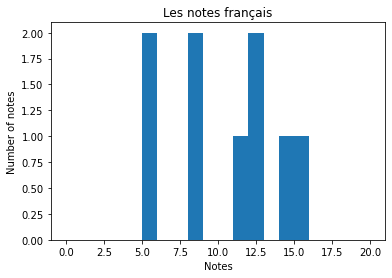

In [3]:
plt.hist(X['fran'], bins=np.arange(21))
plt.ylabel("Number of notes")
plt.xlabel("Notes")
plt.title("Les notes français")

On voit ici nos données sous la forme d'un graphique en bar, ces données ont été regroupés dans des classes par exemple on a 1 élève qui à entre 14 et 15 et un autre qui a entre 15 et 16. 
On voit que l'on a moins d'individu avec des notes inférieurs à 10 que d'individus avec des notes supérieurs à 10.

Histogramme et données pour le latin

Text(0.5, 1.0, 'Les notes de latin')

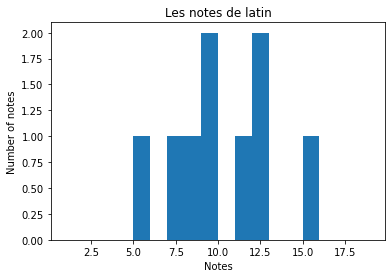

In [4]:
plt.hist(X['lati'], bins=np.arange(1,20))
plt.ylabel("Number of notes")
plt.xlabel("Notes")
plt.title("Les notes de latin")

On voit ici nos données sous la forme d'un graphique en bar, ces données ont été regroupés dans des classes. 
On voit que l'on a des notes plus centrée autour du 10 avec seulement 2 èlèves qui se détache 1 qui a entre 5 et 6 et  l'autre entre 15 et 16.

Nuage de points des maths et des sciences

Text(0.5, 1.0, 'Les notes de maths et de sciences')

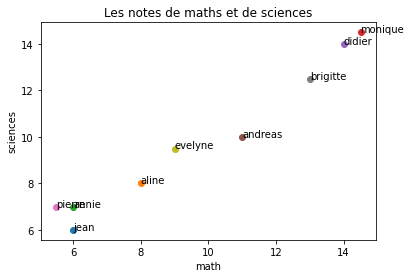

In [5]:
for i in range(0,len(X)):
  plt.scatter(X['math'][i],X['scie'][i])
  plt.text(X['math'][i],X['scie'][i],nomi[i])
plt.ylabel("sciences")
plt.xlabel("math")
plt.title("Les notes de maths et de sciences")

On voit ici nos données sous la forme d'un nuage de points avec chaque individu afficher en fonction des notes de science et de math. 
Les notes sont entre 6 et 14 et on remarque que chaque individu a des notes quasiment identiques ou très proches entre les deux matières. Cela dénote une correlation entre la science et les math.

Nuage de point de math et de dessin

Text(0.5, 1.0, 'Les notes de maths et de dessin')

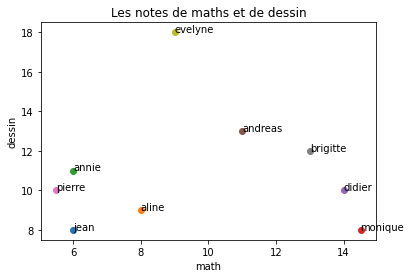

In [6]:
for i in range(0,len(X)):
  plt.scatter(X['math'][i],X['d-m '][i])
  plt.text(X['math'][i],X['d-m '][i],nomi[i])
plt.ylabel("dessin")
plt.xlabel("math")
plt.title("Les notes de maths et de dessin")

On voit ici nos données sont sous la forme d'un nuage de points avec chaque individu afficher en fonction des notes de dessins et de maths. 
Les notes sont entre 8 et 18 pour le  dessin alors que l'on a des notes entre 6 et 14 pour les maths.
On remarque que l'élève avec les moins bonne notes en dessin mais aussi en math est jean alors que le meilleur en dessin et en math n'est pas la même personne. Globalement on ne voit pas de lien entre les deux matières.

1.2 Calcul de l'ACP

In [7]:
from sklearn.decomposition import PCA
p = 5
acp = PCA(n_components=p)
cc = acp.fit_transform(X) ## cc contient les projections

print(cc)

[[-8.70090684 -1.70270455 -2.55391818 -0.14945398  0.11731596]
 [-3.93859585 -0.70854405 -1.81046443 -0.09068389 -0.04349922]
 [-3.20939241  3.45905516 -0.30066167  0.17254286 -0.01928215]
 [ 9.75574148  0.21574207 -3.34367256 -0.17347137 -0.10041455]
 [ 6.37142221 -2.17333261 -0.95705878  0.07066256  0.18799232]
 [-2.97401714 -4.65093218  2.63494569 -0.02321315 -0.14809545]
 [-1.05096657  6.22717416 -1.68806364  0.11529582 -0.04281219]
 [ 1.98053256 -4.06855621  1.40071215  0.24321198 -0.01039742]
 [ 1.76618257  3.40209823  6.61818142 -0.16489082  0.0591927 ]]


On voit ici la projection sur l'ensemble des individus et des notes.

1.3 Représentation

Evolution de l'inertie

Text(0.5, 1.0, "l'importance des axes ici, on voit que la premiere représente 20% des résultats")

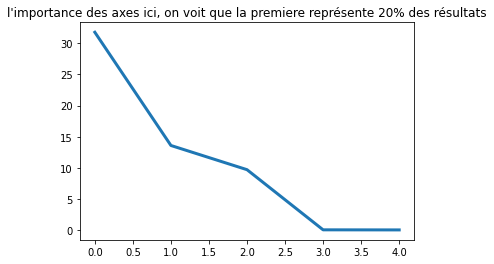

In [8]:
plt.plot(acp.explained_variance_)
plt.title("l'importance des axes ici, on voit que la premiere représente 20% des résultats")

On voit ici l'évolution de l'importance des axes, la premiere représente 20% des résultats et la deuxieme 10%. On remarque alors que l'axe 1 et 2 rassemble la majorité des informations, ces 2 axes sont à conservés.

Représenter les indivisu dans les plans E1 avec E2 ou E1 avec E3

Text(0.5, 1.0, 'E1 U E2')

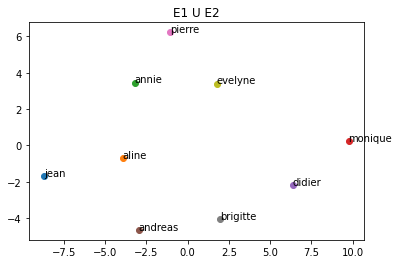

In [9]:
for i in range(0,len(cc)):
  plt.scatter(cc[i,0],cc[i,1])
  plt.text(cc[i,0],cc[i,1],nomi[i])
plt.title("E1 U E2")

Nous avons ici une projections des individus entre l'axes 1 et 2. On remarque que l'ensemble des individus sont éloigné les uns des autres.

Text(0.5, 1.0, 'E1 U E3')

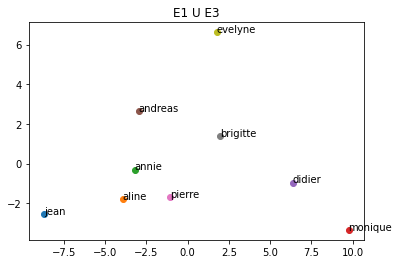

In [10]:
for i in range(0,len(cc)):
  plt.scatter(cc[i,0],cc[i,2])
  plt.text(cc[i,0],cc[i,2],nomi[i])
plt.title("E1 U E3")

Nous avons ici une projections des individus entre l'axes 1 et 3. On remarque qu'il y a un petit groupe qui se rassemble et 3 individus soit un tiers des indifividus sont concentrés dans la même zone.

Correlations entre les individus Ek et les composantes principales Yj
Si plus petit que -1 alors = -1 et si plus grand que 1 alors =1

In [11]:
import math
p = 5
for k in range(p):
  for j in range(p):
    print("Corr(", k, ", ", j, "): ", acp.components_[j, k] * math.sqrt(acp.explained_variance_[j] / np.var(cc[k], ddof=1)))

Corr( 0 ,  0 ):  0.8090979439740058
Corr( 0 ,  1 ):  -0.5828199204020811
Corr( 0 ,  2 ):  0.0445667028374144
Corr( 0 ,  3 ):  -0.012592823594874127
Corr( 0 ,  4 ):  -0.01682745928560761
Corr( 1 ,  0 ):  1.7548385797258528
Corr( 1 ,  1 ):  -0.8417466876965891
Corr( 1 ,  2 ):  0.02762534544439914
Corr( 1 ,  3 ):  0.05309162096093498
Corr( 1 ,  4 ):  0.03534535384994066
Corr( 2 ,  0 ):  1.1734177376597938
Corr( 2 ,  1 ):  1.013277334564846
Corr( 2 ,  2 ):  -0.14222436375871236
Corr( 2 ,  3 ):  0.026025333023900945
Corr( 2 ,  4 ):  -0.018253547576681458
Corr( 3 ,  0 ):  0.5509660209344097
Corr( 3 ,  1 ):  0.24023900104272308
Corr( 3 ,  2 ):  -0.014152902629245392
Corr( 3 ,  3 ):  -0.0212578453270437
Corr( 3 ,  4 ):  0.009635017034549796
Corr( 4 ,  0 ):  0.052166817423883204
Corr( 4 ,  1 ):  0.12570469668081555
Corr( 4 ,  2 ):  0.9334744236544069
Corr( 4 ,  3 ):  0.0016267338330587635
Corr( 4 ,  4 ):  -0.0004032928037652958


On voit ici les correlations entre les individus et les composantes principales, on remarque que pratiquement à chaque fois on a une forte correlation entre l'individus et les deux premières composantes, ce qui valide notre hypothèse précédente de nous basé sur les 2 premiers axes.

Correlations entre les matières initiales et les 3 premiers axes factoriels

In [12]:
for m in nomv:
  for j in range(3):
    sum = 0
    sum1 = 0
    sum2 = 0
    sum3 = 0
    for i in range(len(X)):
      sum1 += (X[m][i]* cc[i,j])
      sum2 += X[m][i]**2 
      sum3 += cc[i,j]**2
    sum = sum1 /math.sqrt(sum2 * sum3)
    print("Corr(", m, ", ", j, "): ", sum)


Corr( math ,  0 ):  0.2671158898466002
Corr( math ,  1 ):  -0.19241238074821748
Corr( math ,  2 ):  0.014713267503158317
Corr( scie ,  0 ):  0.2621925963078867
Corr( scie ,  1 ):  -0.1257664106719209
Corr( scie ,  2 ):  0.004127536931118093
Corr( fran ,  0 ):  0.2424074412065639
Corr( fran ,  1 ):  0.20932525393244544
Corr( fran ,  2 ):  -0.02938104904118701
Corr( lati ,  0 ):  0.246703004648013
Corr( lati ,  1 ):  0.10757048736029519
Corr( lati ,  2 ):  -0.0063371668496072136
Corr( d-m  ,  0 ):  0.014296690821278758
Corr( d-m  ,  1 ):  0.03445027456103652
Corr( d-m  ,  2 ):  0.2558253672275661


Nous remarquons ici qu'il n'y a aucune correlation entre les matières et le 3ème axe factoriel exepté pour le dessins. Inversement les matières semble en correlation avec les 2 premiers axes factoriels exepté pour le dessin. Les notes dans la matière semble donc être atypique alors que dans les autres matières elles sont logiques et reflète le niveau de l'étudiant.

Représentation simultanée des indiv et des vars

In [13]:
def my_biplot(score=None,coeff=None,coeff_labels=None,score_labels=None,nomx = None,nomy = None):
    
    cmap="Set1"
    xs = score[:,0]
    ys = score[:,1]

    if (len(xs) != len(ys)) : print("Warning ! len(x) != len(y)")
    
    x_c = (xs-xs.mean())/(xs.max() - xs.min())
    y_c = (ys-ys.mean())/(ys.max() - ys.min())
    

    fig = plt.figure(figsize=(6,6),facecolor='w') 
    ax = fig.add_subplot(111)

    # Affichage des points
    ax.scatter(x_c,y_c,cmap=cmap)
    if score_labels is not None :
        n = len(x_c)
     
        for i in range(0,n) :
            
            plt.text(x_c[i]+0.01,y_c[i],score_labels[i])

    
    
    x_circle = np.linspace(-1, 1, 100)
    y_circle = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x_circle,y_circle)
    F = X**2 + Y**2 - 1.0
    #fig, ax = plt.subplots()
    plt.contour(X,Y,F,[0])
    p = coeff.shape[0]
    
    for i in range(0,p):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,head_width=0.05, head_length=0.05)
            
        if coeff_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, coeff_labels[i], color = 'g', ha = 'center', va = 'center')
    
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    plt.xlabel(nomx)
    plt.ylabel(nomy)
    plt.grid(linestyle='--')
    plt.show()

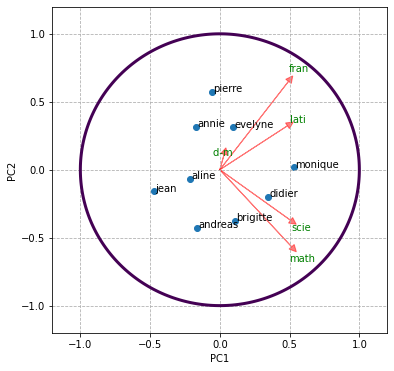

In [14]:
my_biplot(score=cc[:,0:2],coeff=np.transpose(acp.components_[0:2,:]),coeff_labels=nomv,score_labels=nomi,nomx = "PC1",nomy = "PC2")

Nous avons ici la représentation des individus et des variables dans les plans E1 U E2 et E1 U E3.
Nous retrouvons à nouveau ici notre hypothèse précédente ou  le dessin est atypique alors que le français et le latin ou  les sciences et les maths sont liés. On retrouve le moins bon étudiant jean et un niveau moyen chez les autres étudiants sauf dans certaines matières.

2. Données réelles

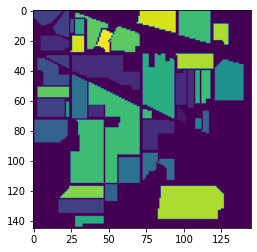

In [15]:
from scipy.io import loadmat

imgtmp = loadmat("/content/Indian_pines_corrected.mat")
img = np.float32(imgtmp['indian_pines_corrected'])

maptmp = loadmat("/content/Indian_pines_gt.mat")
map = (maptmp['indian_pines_gt'])

res = img[:,:,18]
plt.imshow((res-np.min(res))/(np.max(res)-np.min(res)))

# On normalise avant affichage car ce sont des réels
plt.imshow(map) #Pas besoin de normaliser

Nous avons ici notre image mappé, avec nos 16 différentes classes.

calcul de l'ACP

In [16]:
img = img.reshape((145*145, 200))
p = 200
acp = PCA(n_components=p)
cc = acp.fit_transform(img) ## cc contient les projections

Ici nous avons reshape l'image de base pour obtenir une acp sur 200 colonnes et 145 * 145 individus.

evaluation des données grâce à un axes

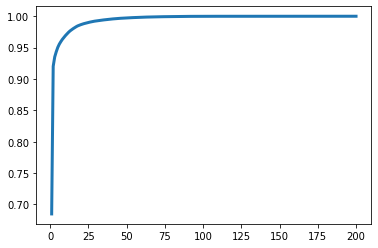

In [17]:
plt.plot(np.arange(1, p+1), np.cumsum(acp.explained_variance_ratio_))
#à l'oeil 25 axes sont nécessaires
# 25 données contiennent 98% de l'information

Avec une courbe en cumulé on voit clairement que l'ensemble des informations est contenus dans 25 à 50 axes. On en déduit que seulement une partie du spectre est à traiter. L'ensemble des données obtenus sur différentes longueurs d'ondes s'avère être peu utile mais permet de trouver les bonnes longueur d'onde.

On visuallise en niveau de gris et en couleur notre acp

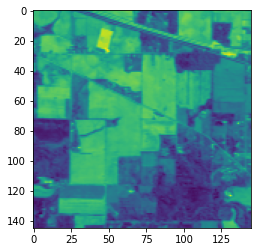

In [18]:
cc_gris = cc[:,0].reshape(145,145)
plt.imshow(cc_gris)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


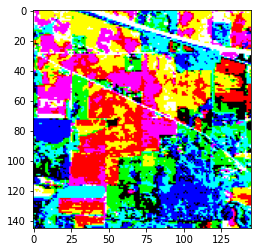

In [19]:
cc_couleur = cc[:,0:3].reshape(145,145,3)
plt.imshow(cc_couleur)

En comparant l'image de base et celle en gris on vois qu'elle sont quasi identique et l'image en niveaux de gris ne nous apporte que peu d'informations suplémentaires. Alors que celle sur les 3 axes principaux montre tout de suite un résultat, on y voit nos champs en jaune,rose et rouge. Puis les zones vides qui ne nous interessent pas en bleu et vert, même si certaines informations sont perdus beaucoup de données sont conservés sur ces 3 axes seulement.

Affichage et commentaire de l’axe k la signature spectrale de l’axe.

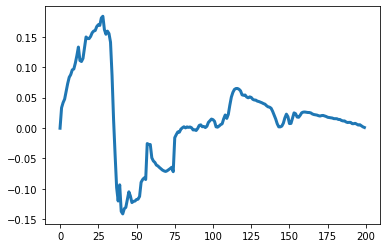

In [20]:
plt.plot(acp.components_[0,:])

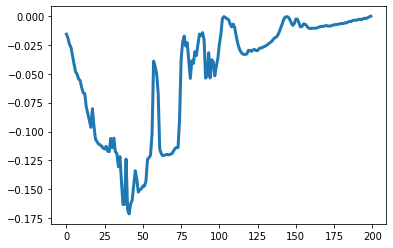

In [21]:
plt.plot(acp.components_[1,:])

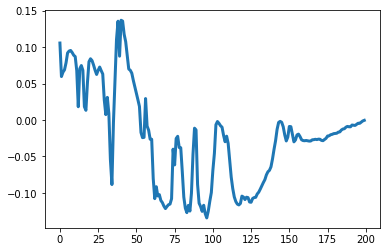

In [22]:
plt.plot(acp.components_[2,:])

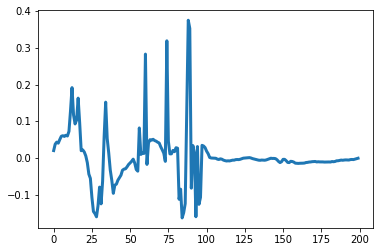

In [23]:
plt.plot(acp.components_[3,:])

Ici nous avons les signatures pour k = 0,1,2,3 on remarque que certaines zone contiennent beaucoup d'informations mais plus le k est élevé plus les zones qui ne contiennent pas d'informations augmentent.

3. Programmation de l'ACP

In [28]:
def my_acp(X):
    X = X.T
    n, p = X.shape
    X_centre = np.zeros((n, p))
    for i in range(n):
        X_centre[i] = X[i] - np.mean(X[i])
    #X_centre = X_centre.T
    var_cov = np.matmul(X_centre, X_centre.T) / p

    val_propre, vec_propre = np.linalg.eigh(var_cov)
    
    val_propre = val_propre[::-1]

    lamb = np.zeros(n)
    
    for i in range(n):
        lamb[i] = val_propre[i] / np.sum(val_propre)
        
    u = np.flipud((vec_propre).T)
    print("u=", u)
    
    for i in range(n):
      if(np.sum(u[i])< 0):
        u[i] = u[i] * - 1

    C = np.zeros((n, p))
    
    for i in range(n):
        for j in range(p):
            print("X_centre[:,j].T==", X_centre[:,j].T)
            print("u[i]", u[i])
            C[i][j] = np.matmul(X_centre[:,j].T, u[i])
    
    C = C.T
        
    return C, lamb, u
        
my_acp(np.array([
    [89, 50],
    [114, 58.5],
    [111, 75.4],
    [44, 5.3],
    [10.4, 0],
    [57, 20.9],
    [75, 23.9],
    [106, 55.1],
    [10, 0.9],
]))


u= [[-0.82786052 -0.56093401]
 [ 0.56093401 -0.82786052]]
X_centre[:,j].T== [20.51111111 17.77777778]
u[i] [0.82786052 0.56093401]
X_centre[:,j].T== [45.51111111 26.27777778]
u[i] [0.82786052 0.56093401]
X_centre[:,j].T== [42.51111111 43.17777778]
u[i] [0.82786052 0.56093401]
X_centre[:,j].T== [-24.48888889 -26.92222222]
u[i] [0.82786052 0.56093401]
X_centre[:,j].T== [-58.08888889 -32.22222222]
u[i] [0.82786052 0.56093401]
X_centre[:,j].T== [-11.48888889 -11.32222222]
u[i] [0.82786052 0.56093401]
X_centre[:,j].T== [ 6.51111111 -8.32222222]
u[i] [0.82786052 0.56093401]
X_centre[:,j].T== [37.51111111 22.87777778]
u[i] [0.82786052 0.56093401]
X_centre[:,j].T== [-58.48888889 -31.32222222]
u[i] [0.82786052 0.56093401]
X_centre[:,j].T== [20.51111111 17.77777778]
u[i] [-0.56093401  0.82786052]
X_centre[:,j].T== [45.51111111 26.27777778]
u[i] [-0.56093401  0.82786052]
X_centre[:,j].T== [42.51111111 43.17777778]
u[i] [-0.56093401  0.82786052]
X_centre[:,j].T== [-24.48888889 -26.92222222]
u[i] [

(array([[ 26.95249925,   3.21214042],
        [ 52.41695125,  -3.77439551],
        [ 59.41315451,  11.89924924],
        [-35.37497432,  -8.55119406],
        [-66.16403792,   5.90852803],
        [-15.86221702,  -2.92871218],
        [  0.7220743 , -10.54194286],
        [ 43.88689148,  -2.10164917],
        [-65.99034151,   6.8779761 ]]),
 array([0.97727747, 0.02272253]),
 array([[ 0.82786052,  0.56093401],
        [-0.56093401,  0.82786052]]))

In [25]:
X = np.transpose(pd.read_csv("/content/notes.csv", header=0, sep=';', index_col=0))

nomi = list(X.index) # noms des individus
nomv = list(X.columns) # noms de variables

Y = np.array(X)
C, lamb, u = my_acp(Y)

print("C", C)
print("lamb", lamb)
print("u", u)

p = 5
acp = PCA(n_components=p)
cc = acp.fit_transform(X) ## cc contient les projections

print("cc", acp.explained_variance_ratio_)
print("cc", cc)

u= [[-0.51453535 -0.50698853 -0.49235486 -0.48462835 -0.03062778]
 [ 0.56694916  0.37199576 -0.65035356 -0.32323853 -0.11289333]
 [ 0.05132308  0.01445296 -0.10806565 -0.02254331  0.99245689]
 [-0.28874852  0.55305647  0.39373536 -0.67419539  0.03443659]
 [ 0.57254891 -0.54635285  0.40978192 -0.45343643  0.01266839]]
C [[-8.70090684 -1.70270455 -2.55391818 -0.14945398  0.11731596]
 [-3.93859585 -0.70854405 -1.81046443 -0.09068389 -0.04349922]
 [-3.20939241  3.45905516 -0.30066167  0.17254286 -0.01928215]
 [ 9.75574148  0.21574207 -3.34367256 -0.17347137 -0.10041455]
 [ 6.37142221 -2.17333261 -0.95705878  0.07066256  0.18799232]
 [-2.97401714 -4.65093218  2.63494569 -0.02321315 -0.14809545]
 [-1.05096657  6.22717416 -1.68806364  0.11529582 -0.04281219]
 [ 1.98053256 -4.06855621  1.40071215  0.24321198 -0.01039742]
 [ 1.76618257  3.40209823  6.61818142 -0.16489082  0.0591927 ]]
lamb [5.76887631e-01 2.46547160e-01 1.75919945e-01 4.43737525e-04
 2.01526136e-04]
u [[ 0.51453535  0.50698853 